In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 'train' is the object dataframe


In [110]:
train=pd.read_csv("data/titanic_train.csv")

In [111]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
sns.set_style("whitegrid")

### Plot to show survival-sex dependency of the passengers

<Axes: xlabel='Survived', ylabel='count'>

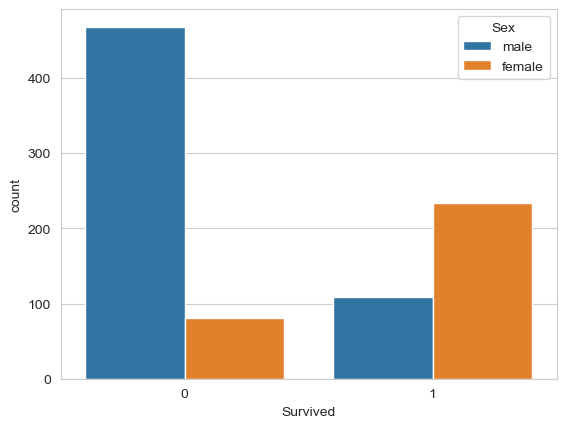

In [113]:
sns.countplot(x="Survived",hue="Sex", data=train)

### Plot to show survival- passenger class dependency of the passengers

<Axes: xlabel='Survived', ylabel='count'>

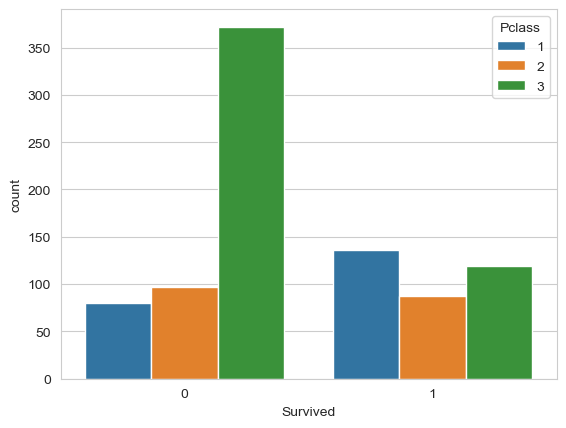

In [114]:
sns.countplot(x="Survived", data=train, hue="Pclass")

### To check for age groups present onboard

/Users/pundarikaksha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



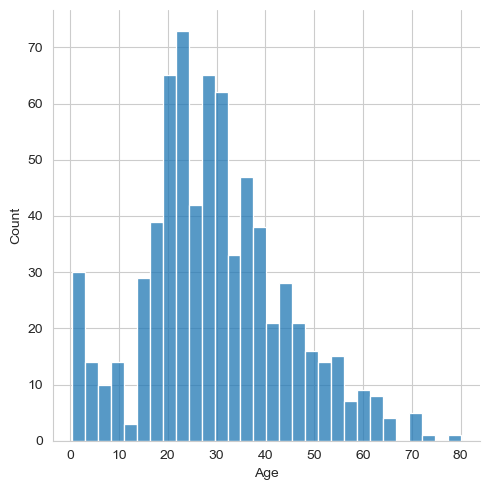

In [115]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

### Distribution of people based on fare

<Axes: xlabel='Fare', ylabel='Count'>

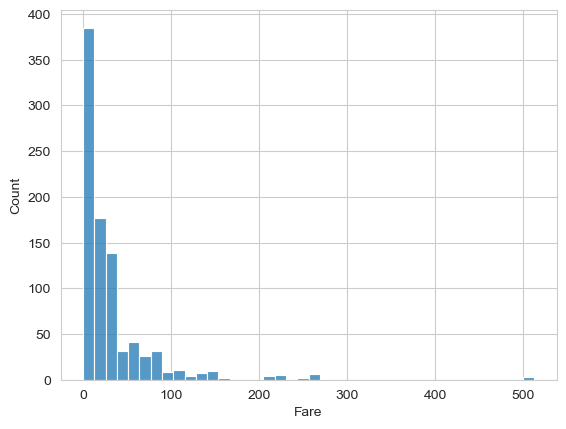

In [116]:
sns.histplot(x="Fare",data=train,bins=40)

### A cufflinks visualization of the fare density distribution

In [117]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind="hist",bins=30)

### Since the ages of a lot of rows are missing, we will impute these ages using cabin classes

<Axes: xlabel='Pclass', ylabel='Age'>

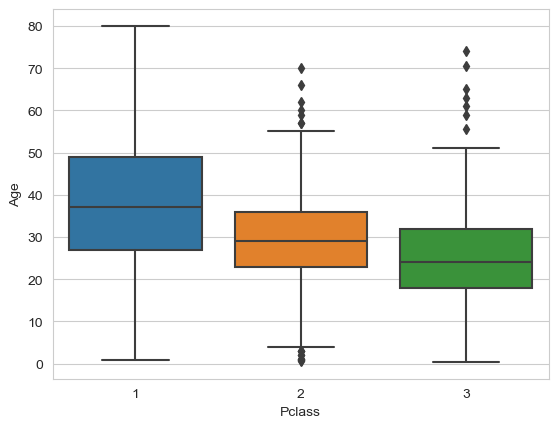

In [118]:
sns.boxplot(x="Pclass",y="Age",data=train)

### We see that Pclass signifies net worth and higher ages can afford better classes

In [119]:
def impute_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: return 24
    else:
        return Age
            

In [120]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

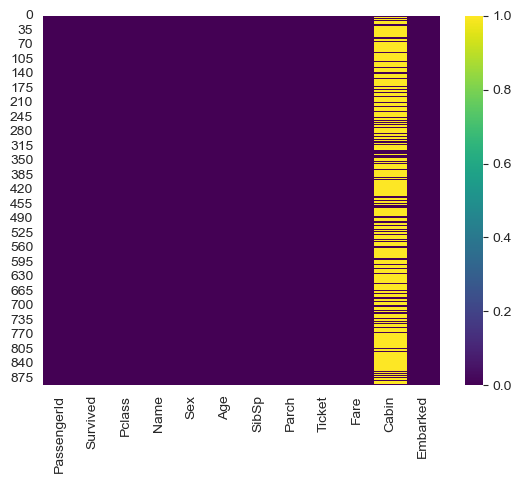

In [121]:
sns.heatmap(train.isnull(),cmap='viridis')

### We can see, the age discrepancies are resolved, but we have way too many missing points in the 'Cabin' section, hence we will disregard the cabin column entirely

In [123]:
train.drop('Cabin',axis=1,inplace=True)

In [125]:
train.dropna(inplace=True)

### Hence data is cleaned now

Now hence the data now consists of columns like Sex which contains string values and
Embarked which consists of characters, we need to convert them into dummy variables so that the ML algorithm can
input their values(i,e 0 or 1 values)

In [128]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [177]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [129]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [178]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [130]:
train=pd.concat([train,sex,embark],axis=1)

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


### Now we will drop the columns that are of no use

In [133]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [134]:
train
#You can see that all the data is numerical, perfect input for an ML algorithm

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,24.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


### Applying the model

I used a logistic regression model, as it fits the criteria perfectly, that a certain set of parameters guide the probability of survival of a certain individual on the ship. Survival can be either 0 or 1.

In [136]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logmodel=LogisticRegression()

In [141]:
logmodel.fit(X_train,y_train)

/Users/pundarikaksha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [142]:
predictions=logmodel.predict(X_test)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



### Now applying the model to an untested dataset

In [164]:
test=pd.read_csv('data/titanic_test.csv')
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.dropna(inplace=True)
sextest=pd.get_dummies(test['Sex'],drop_first=True)
embarktest=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,sextest,embarktest],axis=1)
test.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)


In [165]:
test_predictions=pd.DataFrame(logmodel.predict(test))

In [166]:
test=pd.concat([test,test_predictions],axis=1)

In [168]:
test[0]

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
414    0.0
415    0.0
416    0.0
417    NaN
152    1.0
Name: 0, Length: 418, dtype: float64

In [169]:
test = test.rename(columns={0: 'Survived'})


In [171]:
test=test.dropna()

### Surviving passengers count

In [174]:
(test['Survived']==1).sum()

153

### Non surviving passengers count

In [175]:
(test['Survived']==0).sum()

263

In [176]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892.0,3.0,34.5,0.0,0.0,7.8292,True,True,False,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,False,False,True,0.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,True,True,False,0.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,True,False,True,0.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,False,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...
412,1304.0,3.0,28.0,0.0,0.0,7.7750,False,False,True,0.0
413,1305.0,3.0,24.0,0.0,0.0,8.0500,True,False,True,1.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,False,False,False,0.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,True,False,True,0.0
